# Exercise 3: Incremental Aggregation, Classification Evaluation

## Exercise 3-3: Evaluation (Solution)

## Aggregation Measures
Given a Data Warehouse with e.g. 10 million entries, additional 1000 entries arrive each day. Rather than recomputing the desired aggregates, an incremental adaptation to the new data should be supported. In order to accelerate the (re-)computation, precomputed intermediate results shall be stored and intermediate results for the new entries shall be computed. What
(and how many) values suffice when considering the following aggregates? For each measure note whether it is an algebraic, holistic or distributive measure.

* Product
* Mean
* Variance
* Median

#### Product
The product is a distributive aggregation measure since it is an associative pairwise operation:
\begin{eqnarray*}
prod(D) &=& \prod_{x \in D} x \\
&=& \left( \prod_{x \in D_1} x \right) \cdot \left( \prod_{x \in D_2} x \right) \\
&=& prod(prod(D_1), prod(D_2))
\end{eqnarray*}

#### Mean
Let $D = D_1 \cup D_2$ with $|D_1| = n_1$ and $|D_2| = n_2$ where $D_1$ is the data currently in the data warehouse and $D_2$ is the increment. It suffices to store two values for $D_1$ and $D_2$, the $sum$ and $count$, since
\begin{align*} 
mean(D) = \frac{1}{n_1 + n_2} \sum_{x \in D} x &= \frac{\sum_{x \in D_1} x + \sum_{x \in D_2} x}{n_1 + n_2} \\
&= \frac{sum(D_1) + sum(D_2)}{count(D_1) + count(D_2)}.
\end{align*}

Thus, the mean is an algebraic measure. It is not a distributive measure.
Towards contradiction assume it would, i.e. for all databases $D$ and partitions $D_1 \uplus D_2$ it holds $mean(D) = mean(mean(D_1), mean(D_2))$, i.e. in particular for $D = \{0, 2, 4, 6\}$, and the partition $D = D_1 \uplus D_2$ with $D_1 = \{0\}$, $D_2 = \{2, 4, 6\}$.
Then 
\begin{eqnarray*}
	mean(D) &=& mean(mean(D_1), mean(D_2))\\
	\frac{0+2+4+6}{4} &=& \frac{1}{2}\left(\frac{0}{1} + \frac{2+4+6}{3}\right)\\
	\frac{12}{4} &=& \frac{1}{2} \cdot \frac{12}{3}\\
	3 &=& 2
\end{eqnarray*}
which is a contradiction.

To further derive the conditions when the distribution works, consider
\begin{eqnarray*}
	mean(D) &=& mean(mean(D_1), mean(D_2))\\
	\frac{1}{n_1+n_2} \sum_{x \in D} x &=& \frac{1}{2} \left( \frac{1}{n_1} \sum_{x \in D_1} x + \frac{1}{n_2} \sum_{x \in D_2} x \right)\\
	\frac{1}{n_1 + n_2} \sum_{x \in D_1} x + \frac{1}{n_1 + n_2} \sum_{x \in D_2} x &=& \frac{1}{2n_1} \sum_{x \in D_1} x + \frac{1}{2n_2} \sum_{x \in D_2} x\\
	\left(\frac{1}{n_1 + n_2} - \frac{1}{2n_1}\right) \sum_{x \in D_1} x &=& \left(\frac{1}{2n_2} - \frac{1}{n_1 + n_2}\right) \sum_{x \in D_2} x\\
	\left(\frac{2n_1 - (n_1 + n_2)}{2n_1(n_1 + n_2)}\right) \sum_{x \in D_1} x &=& \left(\frac{n_1 + n_2 - 2n_2}{2n_2(n_1 + n_2)}\right) \sum_{x \in D_2} x\\
	\left(\frac{n_1 - n_2}{2n_1(n_1 + n_2)}\right) \sum_{x \in D_1} x &=& \left(\frac{n_1 - n_2}{2n_2(n_1 + n_2)}\right) \sum_{x \in D_2} x\\
	\left(\frac{n_1 - n_2}{n_1}\right) \sum_{x \in D_1} x &=& \left(\frac{n_1 - n_2}{n_2}\right) \sum_{x \in D_2} x\\
	\frac{1}{n_1} \sum_{x \in D_1} x &=& \frac{1}{n_2} \sum_{x \in D_2} x
\end{eqnarray*}
The last operation is only an equivalence if $n_1 \neq n_2$.
If $n_1 = n_2$, the statement holds trivially.
Concluding, the mean can be computed in distributive manner if and only if the partitions have same size, or the same mean.

#### Variance

Similarly, the variance is also an algebraic measure:
\begin{eqnarray*} 
var(D) &=& \frac{1}{n_1 + n_2 - 1} \left( \sum_{x \in D} x^2 - \frac{1}{n_1 + n_2} \left( \sum_{x \in D} x \right)^2 \right)\\
&=& \frac{1}{n_1 + n_2 - 1} \left( \sum_{x \in D} x^2 - \frac{1}{n_1 + n_2} \left( \sum_{x \in D} x^2 + \sum_{x \in D_1, y \in D_2} xy + \sum_{x \in D_1, y \in D_2} yx \right) \right) \\
&=& \frac{1}{n_1 + n_2 - 1} \left( \sum_{x \in D} x^2 - \frac{1}{n_1 + n_2} \left( \sum_{x \in D_1} x^2 + \sum_{x \in D_2} x^2 + 2 \left( \sum_{x \in D_1} x \right) \left( \sum_{x \in D_2} x \right) \right) \right) \\
&=& \frac{ss(D_1) + ss(D_2) - \frac{1}{count(D_1) + count(D_2)} \left( ss(D_1) + ss(D_2) + 2 \cdot sum(D_1) \cdot sum(D_2) \right)}{count(D_1) + count(D_2) - 1}
\end{eqnarray*}
We need to store three values, the $sum$, $count$ and additionally the sum of squares ($ss$). Note that the variance is not distributive, since the information about central tendency is lost (the variance is shift-invariant). The variance $var(D)$ depends on where $D_1$ and $D_2$ are located in the data space and in general there is no way to infer that from $var(D_1)$ and $var(D_2)$ alone. However, if $mean(D_1) = mean(D_2) = 0$, one can show that
$var(D) = \frac{n_1}{n_1 + n_2} var(D_1) + \frac{n_2}{n_1 + n_2} var(D_2).$

#### Median
The median is a classical holistic measure which means intuitively that we need to look at the whole data at once in order to compute it. For the median to be an algebraic measure, we would need to be able to represent the median of $D$ as an algebraic function of constant size aggregates of $D_1$ and $D_2$. Assume that we have computed such aggregates. Now the idea is that for any two sets $D_1$ and $D_2$, we can construct an example where the $k$-th element of $D_1$ (or $D_2$) is the median. That is, we potentially need to access every single element in $D_1$ (or $D_2$) from a constant size aggregate. This is clearly not possible. Thus, we need to look at the whole sets $D_1$ and $D_2$ together in order to find the median, i.e. the median is a holistic measure.

## Metrics
### Implementation
First, we want to get more familiar with the notions seen in the lecture. For each of the metrics below, implement a function that computes it (when given an array of binary target values and an array of binary predictions):
* TP
* TN
* FP
* FN
* Accuracy
* Precision
* Recall
* F1

In [1]:
def TP(y_true, y_pred):
    return np.sum(np.logical_and(y_true==1, y_pred==1))

def TN(y_true, y_pred):
    return np.sum(np.logical_and(y_true==0, y_pred==0))

def FP(y_true, y_pred):
    return np.sum(np.logical_and(y_true==0, y_pred==1))

def FN(y_true, y_pred):
    return np.sum(np.logical_and(y_true==1, y_pred==0))

def Accuracy(y_true, y_pred):
    tp = TP(y_true, y_pred)
    tn = TN(y_true, y_pred)
    return (tp + tn) / len(y_true)

def Precision(y_true, y_pred):
    tp = TP(y_true, y_pred)
    fp = FP(y_true, y_pred)
    return tp / (tp + fp)

def Recall(y_true, y_pred):
    tp = TP(y_true, y_pred)
    fn = FN(y_true, y_pred)
    return tp / (tp + fn)

def F1(y_true, y_pred):
    tp = TP(y_true, y_pred)
    fp = FP(y_true, y_pred)   
    fn = FN(y_true, y_pred)
    return 2*tp / (2*tp + fn + fp)


### Accuracy
What is a major shortcoming of the accuracy as a metric? Design a scenarion that demonstrates this. What would be a sensible alternative in your scenario?

The accuracy is not reliable for imbalanced data. For instance, consider a disease that only occurs in 1% percent of the observed cases. Then, a useless classifier that always predicts that the disease is not present achieves an accuracy of 99%.

We take the recall into account, we see that it is 0 with this classifier. Hence, we should try to build a classifier that achieves a higher recall, in order to detect many people with the disease and select them for further investigations. But, we should simultaneously keep the precision on a sensible level.

### Relation of Precision, Recall and F1 measure

Show that F1 measure is the harmonic mean of precision and recall, i.e. the reciprocal of the arithmetic mean of reciprocals.

$$ F1 = \frac{2 \cdot Prec  \cdot Rec}{Prec + Rec} 
= \left(\frac{Prec + Rec}{2 \cdot Prec  \cdot Rec} \right)^{-1}
= \left(\frac{Prec}{2 \cdot Prec  \cdot Rec} + \frac{Rec}{2 \cdot Prec  \cdot Rec}\right)^{-1}
= \left(\frac{1}{2}\left(\frac{1}{Prec} + \frac{1}{Rec}\right)\right)^{-1}$$

So, what does this mean practically? To find out, visualize the F1 measure as a function of precision and recall and compare it to the minimum and the arithmetic mean/average of precision and recall. Describe your findings.

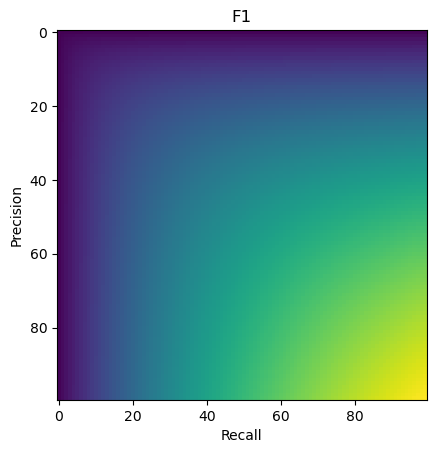

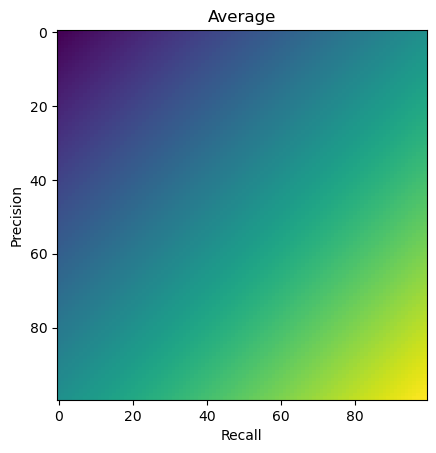

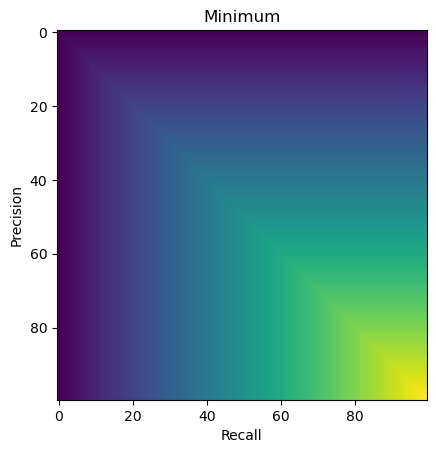

In [2]:
import numpy as np
import matplotlib.pyplot as plt
precision = np.linspace(0.01,1,100)
recall = np.linspace(0.01,1,100)
f1 = np.zeros((len(precision), len(recall)))
minimum = np.zeros((len(precision), len(recall)))
avg = np.zeros((len(precision), len(recall)))

for i in range(len(precision)):
    for j in range(len(recall)):
        f1[i,j] = 2*precision[i]*recall[j] / (precision[i] + recall[j])
        minimum[i,j] = min(precision[i], recall[j])
        avg[i,j] = (precision[i] + recall[j]) / 2
        
plt.imshow(f1)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('F1')
plt.show()

# compare to avg and minimum
plt.imshow(avg)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('Average')
plt.show()

plt.imshow(minimum)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('Minimum')
plt.show()

Apparently, the F1 measure is more sensitive to small values than the arithmetic mean (similar to the minimum, which is only dependent on the smaller value). Thus, it provides a sensible way of balancing precision and recall. In contrast to that, the arithmetic mean still achieves a value of 0.5 if the precision is 1 and the recall is 0 (vice versa).

## Cross Validation

### Implementation
Implement a class that allows you to run a k-fold cross validation when given a number of folds k, a dataset X with targets y, an untrained model that has functions `fit(X,y)` and `predict(X)` and a metric that follows the signature from above. The result of the cross-validation should be a list/array of the scores obtained for each test fold.

Hint: Be careful that the model is trained from scratch for every fold.

In [3]:
from sklearn.base import clone
class CV:
    def __init__(self, k, X, y, metric):
        self.k = k
        self.n = len(X)
        n_k = self.n // self.k
        order = np.arange(self.n)
        np.random.shuffle(order)
        self.X_k = [X[order][i*n_k:(i+1)*n_k] for i in range(self.k)]
        self.y_k = [y[order][i*n_k:(i+1)*n_k] for i in range(self.k)]
        self.metric = metric
        
    def run(self, model):        
        scores = []
        for i in range(self.k):
            model_i = clone(model)
            score_i = self.run_single_fold(model_i, i)
            scores.append(score_i)
        return scores
            
    def run_single_fold(self, model, fold):
        X_train = np.concatenate([self.X_k[i] for i in range(self.k) if i != fold], axis=0)
        y_train = np.concatenate([self.y_k[i] for i in range(self.k) if i != fold], axis=0)
        X_test = self.X_k[fold]
        y_test = self.y_k[fold]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = self.metric(y_test, y_pred)
        return score
        

Test your class for `sklearn.linear_model.LogisticRegression`, your implementation of the accuracy and the Iris dataset where we are only interested in class 1 for simplicity.

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y=True)
y = (y == 1).astype(int)

In [5]:
cv = CV(k=5,
        X=X,
        y=y,
        metric=Accuracy)
scores = cv.run(LogisticRegression())
scores, np.mean(scores), np.std(scores)

([0.7333333333333333,
  0.7666666666666667,
  0.6333333333333333,
  0.6666666666666666,
  0.6333333333333333],
 0.6866666666666666,
 0.05416025603090642)

### Determinacy
Is k-fold cross validation deterministic (assuming that model training and prediction is deterministic)?

In general, cross validation is not determistic because the splits can vary. However, for k=n, i.e. leave-one-out cross validation, the result will be deterministic as the splits will be also deterministic in this case. A downside of leave-one-out cross validation is that we have to fit n models which may be computationally intractable.